## Load Necessary Libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

## load dataset ie, "googleplaystore.csv" file
 The dataset contains 13 features
- App : Application name
- Category : Category the app belongs to ss
- Rating : Overall user rating of the app (as when scraped)
- Reviews : Number of user reviews for the app (as when scraped)
- Size : Size of the app (as when scraped)
- Installs : Number of user downloads/installs for the app (as when scraped)
- Type : Paid or Free
- Price : Price of the app (as when scraped)
- Content Rating : Age group the app is targeted at - Children / Mature 21+ / Adult
- Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
- Last Updated : Date when the app was last updated on Play Store (as when scraped)
- Current Ver : Current version of the app available on Play Store (as when scraped)
- Android Ver : Min required Android version (as when scraped)

In [2]:
df = pd.read_csv('googleplaystore.csv')

## Data overview

In [3]:
print(df.shape) #view number of rows and columns in dataset
df.describe(include="all") #overview of dataset

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### NaN represents Null(empty) value
- originally the dataset contains null values. It is difficult to perform mathematical analysis over null and string value.

## Data Cleaning

In [4]:
df.drop_duplicates(subset='App', inplace=True) #remove duplicate rows (remove row's with same App name)
df = df[df['Android Ver'] != 'NaN'] #remove row with null Android Version
df = df[df['Installs'] != 'Free'] #remove "Free" text from Installs column

In [5]:
print('Number of apps in the dataset : {}'.format(len(df))) #check length of rows in dataframe
df.sample(7) #check sample of dataframe

Number of apps in the dataset : 9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
6897,Watch Face BW Inter,PERSONALIZATION,3.1,112,8.8M,"1,000+",Paid,$0.99,Everyone,Personalization,"April 26, 2017",2.1.7,4.3 and up
9617,Squadron - Bullet Hell Shooter,GAME,4.2,177542,40M,"10,000,000+",Free,0,Everyone,Arcade,"May 2, 2016",1.0.7,2.3 and up
2510,Blood Pressure(BP) Diary,MEDICAL,3.7,3596,8.4M,"1,000,000+",Free,0,Everyone,Medical,"July 18, 2018",4.0.9,4.0.3 and up
1916,Doodle Jump,GAME,4.3,1083571,Varies with device,"50,000,000+",Free,0,Everyone,Arcade,"July 20, 2018",Varies with device,Varies with device
7199,CE SmartApp.com,BUSINESS,NaN,0,42M,100+,Free,0,Everyone,Business,"March 16, 2018",102.0.875,4.2 and up
2128,Doctor Pets,FAMILY,4.2,23060,21M,"1,000,000+",Free,0,Everyone,Educational;Education,"July 26, 2018",1.19,4.1 and up
232,Fast Scanner : Free PDF Scan,BUSINESS,4.5,103755,14M,"10,000,000+",Free,0,Everyone,Business,"July 11, 2018",3.9.2,4.1 and up



- Remove '+' from 'Number of Installs' to make it numeric
- Convert all app sizes to MB

In [6]:
# - Installs : Remove + and ,

df['Installs'] = df['Installs'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))


In [7]:
# - Size : Remove 'M', Replace 'k' and divide by 10^-3
#df['Size'] = df['Size'].fillna(0)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)


df['Size'] = df['Size'].apply(lambda x: float(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))

df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

df['Reviews'] = df['Reviews'].apply(lambda x: int(x))
#df['Reviews'] = df['Reviews'].apply(lambda x: 'NaN' if int(x) == 0 else int(x))
#print(df.loc[df.Size == 0.713]) #index = 3384
#df.loc[df.col1 == '']['col2']

# 0 - Free, 1 - Paid
# df['Type'] = pd.factorize(df['Type'])[0]
#print(df.dtypes)

##  Basic Exploratory Data Analysis

- to perform initial investigation to identify patterns and abnormalities

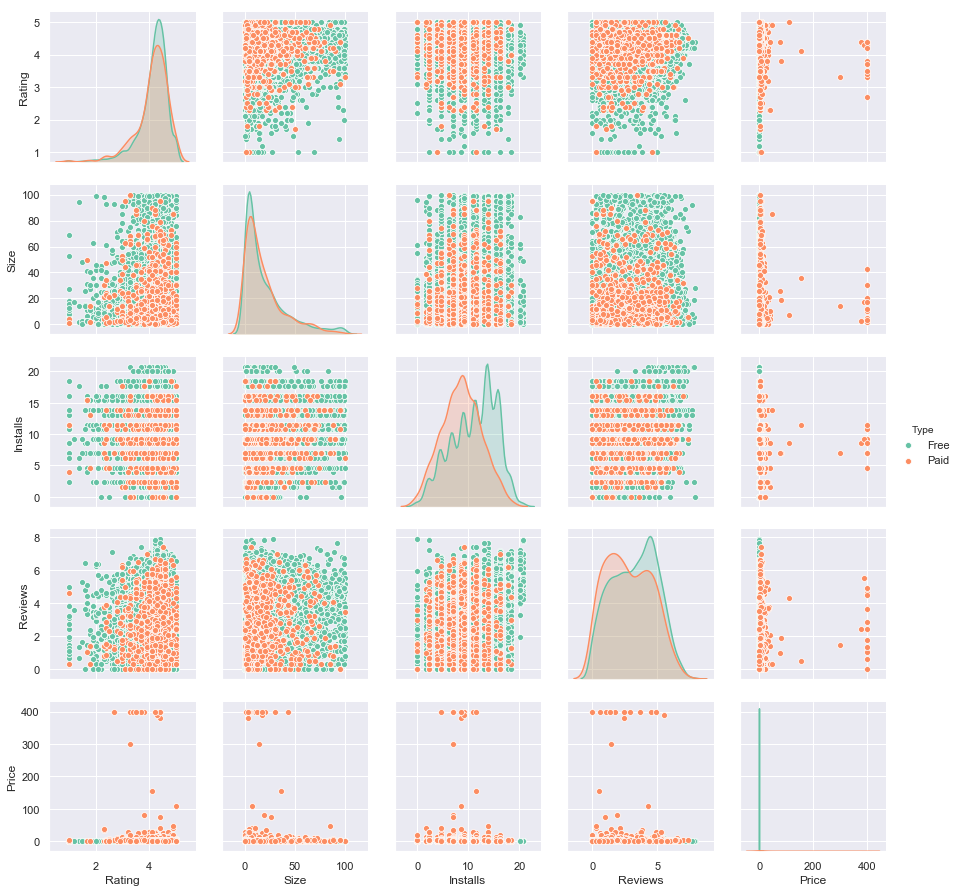

In [8]:
## Remove null value and plot using seaborn pairplot library
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs!=0].dropna()
p = df['Reviews'][df.Reviews!=0].dropna()
t = df['Type'].dropna()
price = df['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), 
                        columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

#### Above Graph Description

- The above graphs are plotted against Rating, Size, Installs, Reviews and Price features over the type of app ie Free or Paid.
- These 6 features are most relevat factor for analysing an app in general.
- Rating: It ranges from 0 to 5
- Size: All app size is taken in MB (Mega Bytes)
- Installs: Total downloads of app from playstore
- Reviews: Total review's given by users on a app
- Price: Price of app
- Type: App either free or paid

We can clearly see the plot made against Price have abnormalities. Also there are some interesting points against rating and size

##  Overview of apps with respect to Catagory

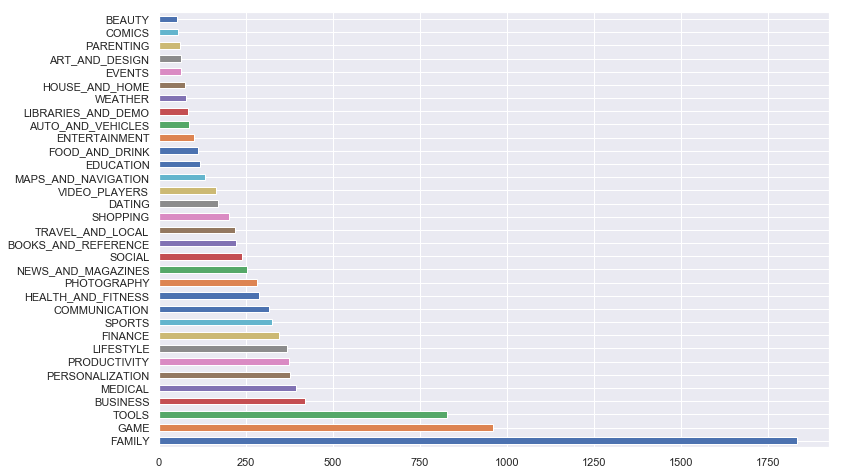

In [9]:
df.Category.value_counts().plot(kind='barh',figsize= (12,8))

- Family category have heighest app's. Similarly Game and Tools category also have high number of app's.

## Paid Apps review
### Lets check Data against Price

Text(0.5,0.98,'Price vs Rating')

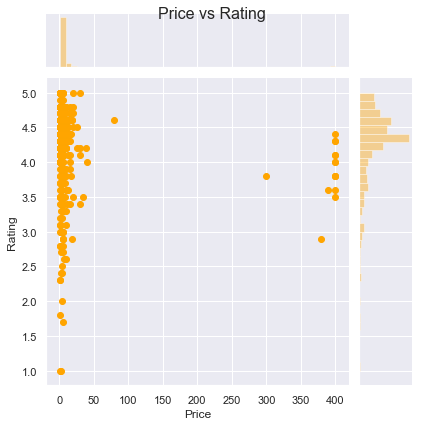

In [10]:
paid_apps = df[df.Price>0]
p = sns.jointplot( "Price", "Rating", color = "orange", data=paid_apps)
p.fig.suptitle("Price vs Rating", size=16)


- Most of the low paid app has heighest rating. It can be clearly seen that low paid app are more downloaded. 
- Low paid app price ranges from $1 to $20. And High paid app are above $300 upto $400. 
- We see one low paid app with very low rating.
- High paid app have quite fair rating.

Text(0.5,0.98,'Price vs Size')

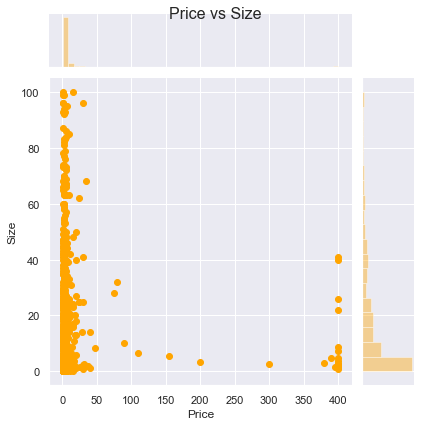

In [11]:
q = sns.jointplot( "Price", "Size", color = "orange", data=paid_apps)
q.fig.suptitle("Price vs Size", size=16)

- High paid app seems to have low size.
- We can make conclusion that,app's with lot of features doesnot necessarily be expensive.

Text(0.5,0.98,'Price vs Installs')

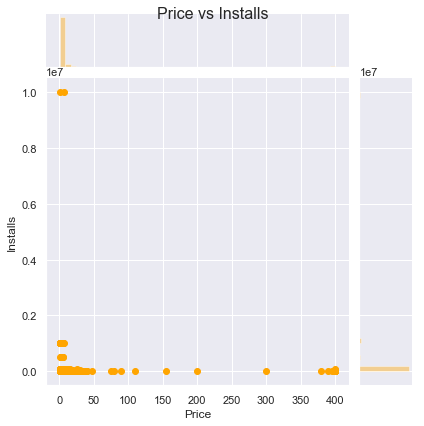

In [12]:
r = sns.jointplot( "Price", "Installs", color = "orange", data=paid_apps)
r.fig.suptitle("Price vs Installs", size=16)

- Paid app's are obviously less installed.

Text(0.5,0.98,'Price vs Review')

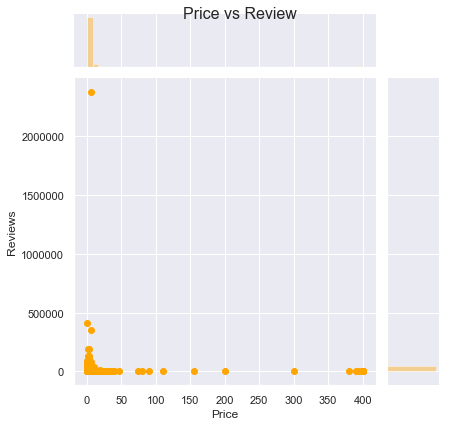

In [13]:
s = sns.jointplot( "Price", "Reviews", color = "orange", data=paid_apps)
s.fig.suptitle("Price vs Review", size=16)

- In graph Price vs Reviews, there is one paid app with more than 2 Millions reviews. 

-

## Free App review

Text(0.5,0.98,'Size vs Rating')

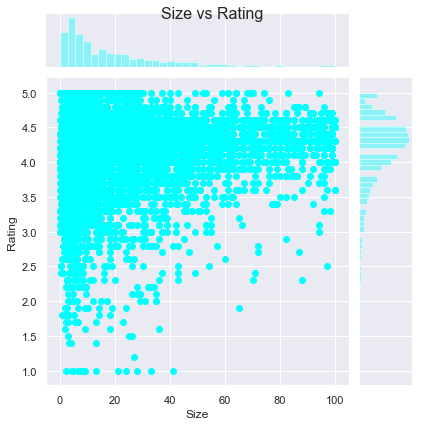

In [14]:
free_apps = df[df.Price==0]
a = sns.jointplot( "Size", "Rating", color="cyan", data=free_apps)
a.fig.suptitle("Size vs Rating", size=16)

Text(0.5,0.98,'Installs vs Rating')

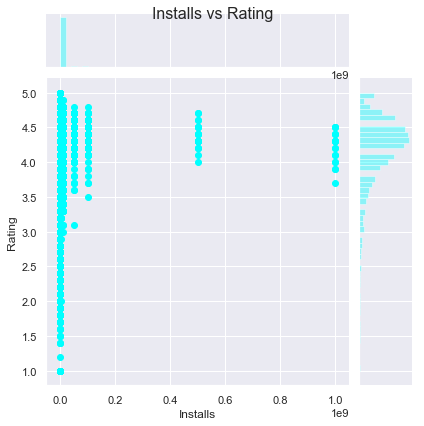

In [15]:
b = sns.jointplot( "Installs", "Rating", color="cyan", data=free_apps)
b.fig.suptitle("Installs vs Rating", size=16)

Text(0.5,0.98,'Size vs Reviews')

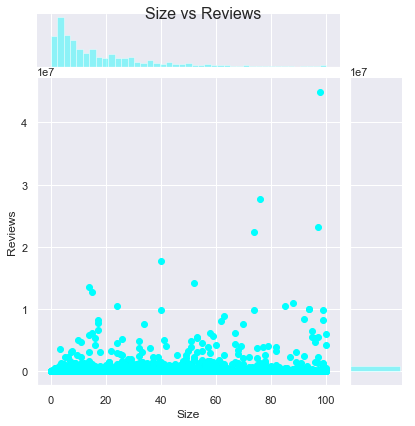

In [16]:
a = sns.jointplot( "Size", "Reviews", color="cyan", data=free_apps)
a.fig.suptitle("Size vs Reviews", size=16)

- one point at top right corner shows big app size along with large number of reviews

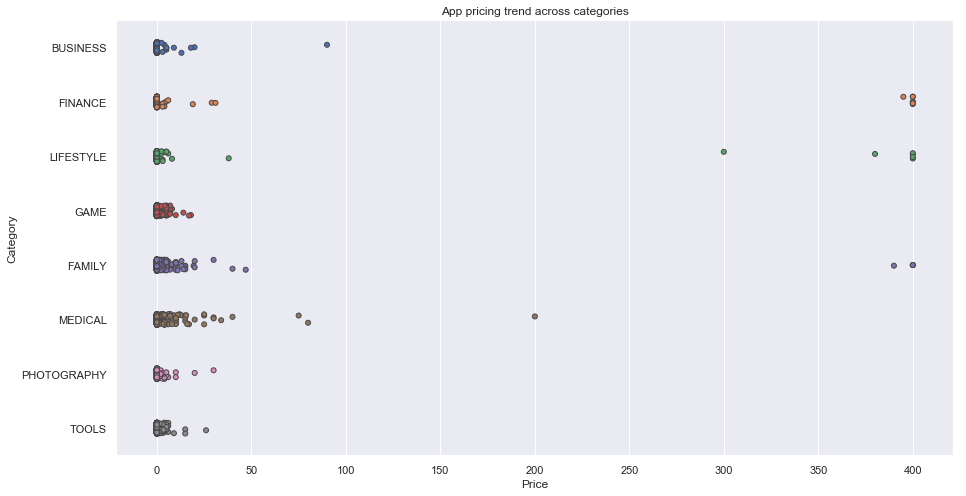

In [17]:
subset_df = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE',
                                 'LIFESTYLE','BUSINESS'])]
sns.set_style('darkgrid')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
p = sns.stripplot(x="Price", y="Category", data=subset_df, jitter=True, linewidth=1)
title = ax.set_title('App pricing trend across categories')


- A Medical Apps can be seen as outlier at price $200. 
- Business, lifestyle and surprisingly Family app's have highest price.